# Load Diffusion Models

In [1]:
# Maker sure have safetensors package installed
%pip install safetensors

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


## Load Stable Diffusion model from Hugging Face respository

In [1]:
import torch
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5"
    , torch_dtype = torch.float16 
    , safety_checker = None
).to("cuda:0")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


## Cache Model files in custom path

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5" 
    , torch_dtype = torch.float16 
    , cache_dir = r"D:\my_model_folder" # cache_dir = r"/sd_model_folder" #linux
    , safety_checker = None
).to("cuda:0")

## Load Safetensor model

In [2]:
import torch
from diffusers import StableDiffusionPipeline
model_path = r"C:\SD_models_common\Stable-diffusion\Deliberate_v2.safetensors"
pipe = StableDiffusionPipeline.from_single_file(
    model_path
    , torch_dtype               = torch.float16 
    , load_safety_checker       = False
).to("cuda:0")

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Asus\.cache\huggingface\hub\models--stable-diffusion-v1-5--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Some weights of the model checkpoint were not used when initializing CLIPTextModel: 
 ['text_model.embeddings.position_ids']
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\diffusers\loaders\single_file.py:543: FutureWarning: `load_safety_checker` is deprecated and will be removed in version 1.0.0. Please pass instances of `StableDiffusionSafetyChecker` and `AutoImageProcessor`using the `safety_checker` and `feature_extractor` arguments in `from_single_file`
  deprecate("load_safety_checker", "1.0.0", deprecation_message)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage direc

  0%|          | 0/50 [00:00<?, ?it/s]

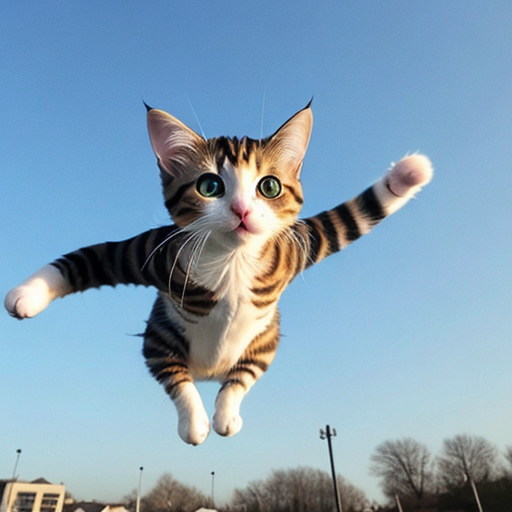

In [3]:
image = pipe(prompt = "a photo of flying cute cat").images[0]
image

## Load CKPT model

In [4]:
import torch
from diffusers import StableDiffusionPipeline
model_path = r"C:\SD_models_common\Stable-diffusion\f222.ckpt"
pipe = StableDiffusionPipeline.from_single_file(
    model_path
    , torch_dtype               = torch.float16 
    , load_safety_checker       = False
).to("cuda:0")

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Some weights of the model checkpoint were not used when initializing CLIPTextModel: 
 ['text_model.embeddings.position_ids']


  0%|          | 0/50 [00:00<?, ?it/s]

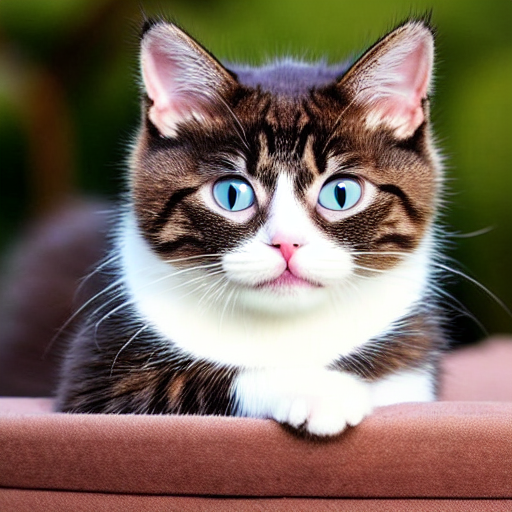

In [5]:
image = pipe(prompt = "a cute cat").images[0]
image

## Convert checkpoint file to Diffusers format

### Convert a `ckpt` file to Diffusers format

In [7]:
from diffusers.pipelines.stable_diffusion.convert_from_ckpt import download_from_original_stable_diffusion_ckpt

ckpt_checkpoint_path = r"D:\temp\anythingV3_fp16.ckpt"
target_part = r"D:\temp\anythingV3_fp16"
pipe = download_from_original_stable_diffusion_ckpt(
    ckpt_checkpoint_path
    , from_safetensors  = False
    , device            = "cuda:0"
)
pipe.save_pretrained(target_part)


global_step key not found in model


Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.14.mlp.fc1.bias', 'vision_model.encoder.layers.7.self_attn.out_proj.bias', 'vision_model.encoder.layers.17.self_attn.v_proj.bias', 'vision_model.encoder.layers.9.mlp.fc2.bias', 'vision_model.encoder.layers.13.self_attn.v_proj.weight', 'vision_model.encoder.layers.21.self_attn.k_proj.bias', 'vision_model.encoder.layers.19.layer_norm2.bias', 'vision_model.encoder.layers.1.mlp.fc2.weight', 'vision_model.encoder.layers.19.self_attn.out_proj.bias', 'vision_model.encoder.layers.4.self_attn.k_proj.weight', 'vision_model.encoder.layers.4.self_attn.out_proj.bias', 'vision_model.encoder.layers.17.mlp.fc2.bias', 'vision_model.encoder.layers.7.self_attn.k_proj.weight', 'vision_model.encoder.layers.17.self_attn.q_proj.bias', 'vision_model.embeddings.position_ids', 'vision_model.encoder.layers.14.self_attn.v_proj.bias', 'vision_model.encoder.layers.15.sel

### Convert a safetensors file to Diffusers format

In [ ]:
from diffusers.pipelines.stable_diffusion.convert_from_ckpt import download_from_original_stable_diffusion_ckpt

ckpt_checkpoint_path = r"D:\temp\deliberate_v2.safetensors"
target_path = r"D:\temp\deliberate_v2"

pipe = download_from_original_stable_diffusion_ckpt(
    ckpt_checkpoint_path
    , from_safetensors  = True
    , device            = "cuda:0"
)
pipe.save_pretrained(target_path)

### Convert a safetensors ControlNet file to Diffusers format
The ControlNet config file in yaml format is required.

In [3]:
from diffusers.pipelines.stable_diffusion.convert_from_ckpt import download_controlnet_from_original_ckpt

ckpt_checkpoint_path = r"D:\temp\controlnetQRPatternQR_v10.safetensors"
config_file = r"D:\temp\controlnetQRPatternQR_v10.yaml"
target_path = r"D:\temp\controlnetQRPatternQR_v10"

pipe = download_controlnet_from_original_ckpt(
    ckpt_checkpoint_path
    , from_safetensors      = True
    , device                = "cuda:0"
    , original_config_file  = config_file
)
pipe.save_pretrained(target_path)

### Use the converted local model file
Load the model file which are converted from the source single safetensors file.

In [9]:
# load loacl diffusers model files using from_pretrained function
import torch
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained(
    r"D:\temp\deliberate_v2"
    , torch_dtype = torch.float16 
    , safety_checker = None
).to("cuda:0")

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

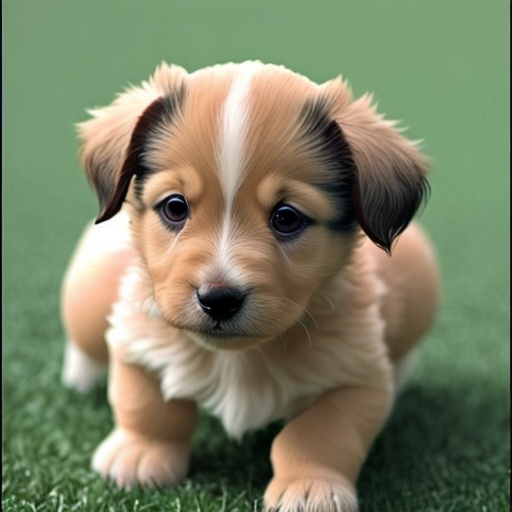

In [11]:
image = pipe("a cute puppy").images[0]
image

## Use Stable Diffusion XL

In [7]:
# load up SDXL from safetensors files
import torch
from diffusers import StableDiffusionXLPipeline, StableDiffusionXLImg2ImgPipeline

# load base model
base_model_checkpoint_path = r"C:\SD_models_common\Stable-diffusion\sd_xl_base_1.0.safetensors"
base_pipe = StableDiffusionXLPipeline.from_single_file(
    base_model_checkpoint_path
    , torch_dtype = torch.float16
    , use_safetensors = True
)

# load refiner model 
refiner_model_checkpoint_path = r"C:\SD_models_common\Stable-diffusion\sd_xl_refiner_1.0.safetensors"
refiner_pipe = StableDiffusionXLImg2ImgPipeline.from_single_file(
    refiner_model_checkpoint_path
    , torch_dtype = torch.float16
    , use_safetensors = True
)

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Some weights of the model checkpoint were not used when initializing CLIPTextModel: 
 ['text_model.embeddings.position_ids']


Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [1]:
# load up SDXL models from model id
import torch
from diffusers import (
    StableDiffusionXLPipeline
    , StableDiffusionXLImg2ImgPipeline
)

# load base model
base_model_checkpoint_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
base_pipe = StableDiffusionXLPipeline.from_pretrained(
    base_model_checkpoint_model_id
    , torch_dtype = torch.float16
)

# load refiner model 
refiner_model_checkpoint_model_id = "stabilityai/stable-diffusion-xl-refiner-1.0"
refiner_pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    refiner_model_checkpoint_model_id
    , torch_dtype = torch.float16
)

/home/andrewzhu/storage_1t_1/az_git_folder/Using-Stable-Diffusion-with-Python/sd_book_prd_p310_venv/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/home/andrewzhu/storage_1t_1/az_git_folder/Using-Stable-Diffusion-with-Python/sd_book_prd_p310_venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:  96%|#########6| 8.71G/9.04G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
# move model to cuda and generate base image latent
from diffusers import EulerDiscreteScheduler

prompt = """
analog photograph of a cat in a spacesuit taken inside the cockpit of a stealth fighter jet,
Fujifilm, Kodak Portra 400, vintage photography
"""

neg_prompt = """
paint, watermark, 3D render, illustration, drawing,worst quality, low quality
"""

base_pipe.to("cuda")
base_pipe.scheduler = EulerDiscreteScheduler.from_config(base_pipe.scheduler.config)
with torch.no_grad(): 
    base_latents = base_pipe(
        prompt = prompt
        , negative_prompt = neg_prompt
        , output_type = "latent"
    ).images[0]
    
base_pipe.to("cpu")
torch.cuda.empty_cache()   


  0%|          | 0/50 [00:00<?, ?it/s]

Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, du

  0%|          | 0/15 [00:00<?, ?it/s]

Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, du

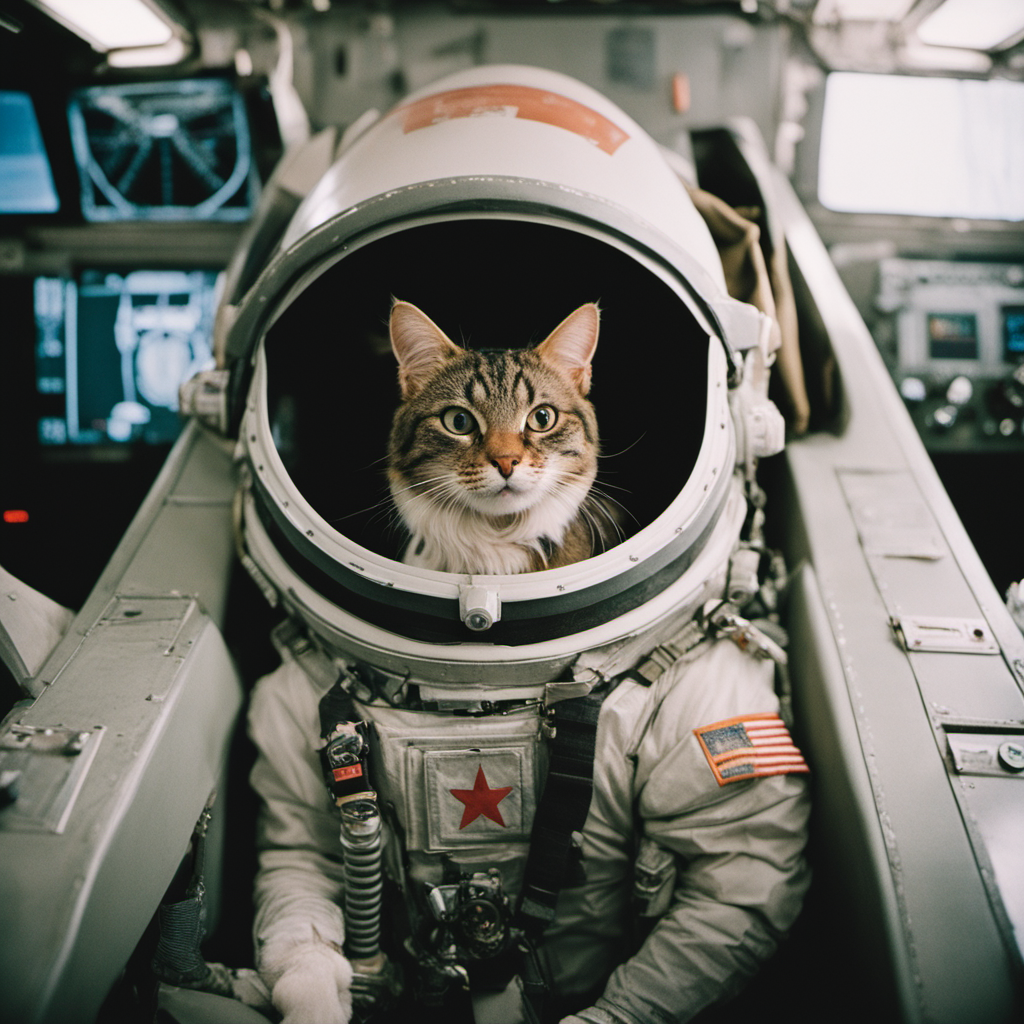

In [9]:
# refine the image
refiner_pipe.to("cuda")
refiner_pipe.scheduler = EulerDiscreteScheduler.from_config(refiner_pipe.scheduler.config)
with torch.no_grad(): 
    image = refiner_pipe(
        prompt = prompt
        , negative_prompt = neg_prompt
        , image = [base_latents]
    ).images[0]

refiner_pipe.to("cpu")
torch.cuda.empty_cache()   
image